# AUTHOR : GANESH S

# TASK 2 :  *PREDICTION USING UNSUPERVISED MACHINE LEARNING*

###  PROBLEM STATEMENT : 
- From the given 'Iris' dataset predict the optimum number of clusters
- perform visualization of the clusters.


### STEPS FOLLOWED FOR THIS TASK ARE AS FOLLOWS 

### STEP 1 : 
- IMPORTING THE LIBRARIES THAT ARE REQUIRED FOR DATA ANALYSIS AND VISUALIZATION

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn.cluster
from sklearn import datasets

### STEP 2 : CREATING A DATAFRAME WITH FEATURE NAMES

In [2]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
print(df.head(10))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
5                5.4               3.9                1.7               0.4
6                4.6               3.4                1.4               0.3
7                5.0               3.4                1.5               0.2
8                4.4               2.9                1.4               0.2
9                4.9               3.1                1.5               0.1


In [4]:
#CHECKING THE COLUMN NAMES IN THE DATAFRAME
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Species'],
      dtype='object')

### STEP 3 : CREATING TARGET FEATURE FROM THE DATAFRAME

In [3]:
df['Species']=iris['target']
df['Species']=df['Species'].apply(lambda x: iris['target_names'][x])

### STEP 4 :
**CHECKING SKEWNESS FOR DIFFERENT FEATURES OF DATA**
- we can see that the 2 columns sepal length and width are positively skewed and the other 2 are negatively skewed
- visualizing for better understanding

sepal length (cm)    0.314911
sepal width (cm)     0.318966
petal length (cm)   -0.274884
petal width (cm)    -0.102967
dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


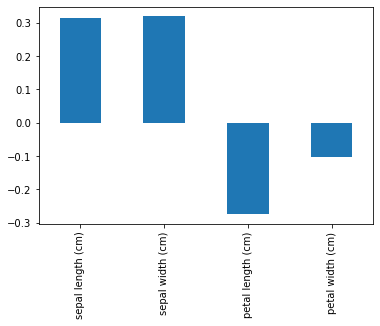

In [20]:
print(df.skew())
print(df.skew().plot(kind="bar"))

### STEP 5 : SHAPE OF THE DATA
 
- From the this we can observe that the given dataset contains **150 rows** and **2 columns** respectively.

In [6]:
df.shape

(150, 5)

### STEP 6 : THE pd.info() function

 - This step helps us to identify the current data types, number of columns etc. ofthe dataset.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### STEP 7: CHECKING NULL VALUES

- a)  This step is one of the most important steps as it helps us to find the columns which have null values and gives the count of missing entries in the dataset. based on its result we can decide for ourselves whether to fill those data with null values or drop them from the data as required.
- b) Here we can see that there are no null values in our dataset.

In [9]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

### STEP 8: ANALYZING SOME STATISTICAL VALUE OF THE DATA

#### THE DESCRIBE FUNCTION IS USED FOR A GENERAL STATISTICAL ANALYSIS OF DATA.

- a) For instance we can see the average or mean study **sepal length (cm)** of the data is 5.84 and minimum for **	petal length (cm)** is around 1.000 in the given data.

- b) Same can be inferred for other features as well.

In [8]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## DATA VISUALIZATION

### STEP 9: BAR PLOT FOR TARGET FEATURE
- Here the target feature is the **Species** column from the given data for which a value_count plotting has been done for better understanding.
- Here the count value for the data is 50.

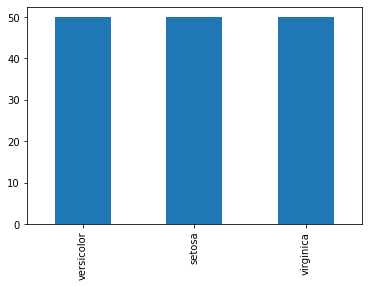

In [10]:
df.Species.value_counts().plot(kind="bar")

### STEP 10: PAIR PLOT FOR TARGET FEATURE
- Pairplots are best to use when we want to  quickly explore distributions and relationships in a dataset.
- I have made pairplot for the dataframe with hue value as **Species** which is our target feature as well.

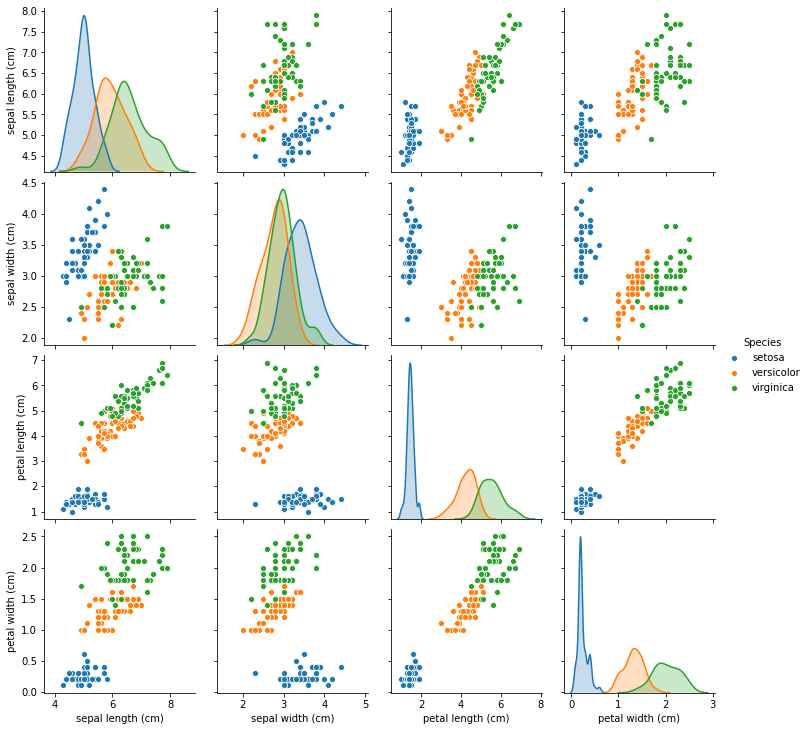

In [11]:
sns.pairplot(df, hue = 'Species')
plt.show()

### STEP 11: CHECKING THE CORRELATION
- This step helps us to identify how better the features are correlated with each other. The darker the shade/color in the heatmap, more is the correlation among the variables.

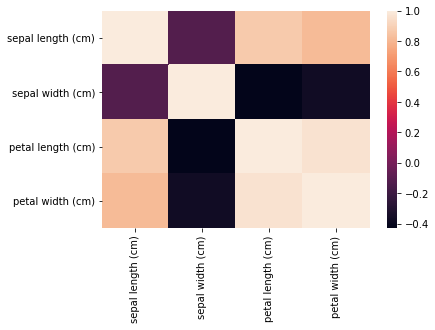

In [31]:
sns.heatmap(df.corr())

### STEP 12 : MODEL BUILDING
 - *CLUSTER BUILDING USING KMeans clustering model.*
 -  *In this type, the dataset is divided into a set of k groups, where K is used to define the number of pre-defined groups. The cluster center is created in such a way that the distance between the data points of one cluster is minimum as compared to another cluster centroid.*
 - *Value of kmeans.inertia should be as low possible for optimum clustering*
 

**Importing Kmeans from scikit library containing clusters.**

In [32]:
x = df.iloc[:,[0,1,2,3]].values

from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_) #sum of squared distances of samples to their closest cluster center. 
        

**ELbow graph method for finding the optimum cluster value of the data**
- In the elbow plot we find that the optimum clusters are found at the point that the curve starts to bend or decreasing. The point at which it occurs is considered as the point of optimum clusters.

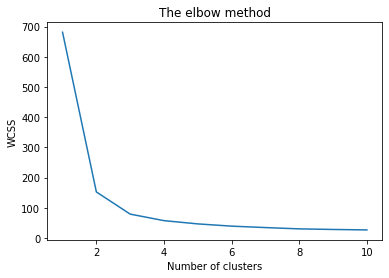

In [33]:
# Plotting the results onto a line graph`allows us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title("The elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS") # Within cluster sum of squares
plt.show()

FROM THE ELBOW GRAPH ABOVE, WE SEE CAN INFER THAT THE OPTIMUM CLUSTER SIZE IS **3 clusters** FOR THIS DATASET PROVIDED.

### STEP 13: VISUALIZATION OF CLUSTER

In [24]:
# KMeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

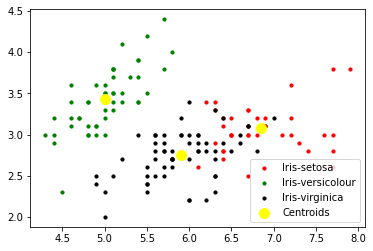

In [27]:
#Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 10, color = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 10, color = 'green', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 10, color = 'black', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, color = 'yellow', label = 'Centroids')
plt.legend()
plt.show()


##  CONCLUSION :
AFTER ANALYZING THE IRIS DATASET AND APPLYING KMEANS CLUSTERING METHOD, THE OPTIMUM NUMBER OF CLUSTERS THIS DATA IS **3 CLUSTERS**.